# **Data Science in Golf: Strokes Gained vs Traditional Metrics - Exploratory Data Analysis (EDA)**

--------------------------------
### **Context** 
-------------------------------
Golf is a great example of how data science can provide valuable insight. Golf is a sport steeped in tradition and has been traditionally evaluated using metrics like scoring average, fairways hit, and greens in regulation. However, these traditional metrics have limitations and may not provide a complete picture of a player's skill. Data science and analytics, specifically the use of Strokes Gained, can help to overcome these limitations by providing a more accurate and comprehensive assessment of a player's performance. 

The use of a normalized set of metrics allows for better comparison across different courses and fields, and can help identify areas for improvement. 

Additionally, there are misconceptions about the game of golf on what skills result in shooting lower scores and winning tournaments, but by using data science and Strokes Gained, it is possible to dispel those misconceptions and focus on facts and facts-based analysis, which can lead to better performance and ultimately better results. 

#### **Strokes Gained**

Strokes Gained (often called the Moneyball of golf) is a relatively new metric in golf that aims to measure a player's performance relative to the rest of the field. It does this by comparing a player's performance on a given hole or round to the expected performance of an "average" golfer. 

Traditional golf metrics, such as scoring average, fairways hit, and greens in regulation, do not take into account the difficulty of the course or the level of competition. Additionally many of these metrics were popularized because they sound good, but often they provide limited insight or in some cases act as misleading metrics. In the example of fairways hit in regulation, this metric does not take into account distance left to the hole. In these cases a shot 10 yards from the hole in the rough would be ranked lower than a shot 300 yards+ from the hole in the fairway, which is clearly counter to what it should be. 

Strokes Gained, on the other hand, uses data from thousands of rounds to calculate the expected performance on each hole and then compares a player's actual performance to that expectation. This allows for a more accurate assessment of a player's skill and can help identify areas where they need to improve.

----------------------------
### **Objective**
-----------------------------
The objective of this project is to analyze data from the 2010 to 2018 PGA tour season using various metrics, including Strokes Gained, to gain insight into the performance of professional golfers. The specific objectives of this project are as follows:

* Draw insight from data from the 2010 to 2018 PGA tour season.
    * Which features lead to the greatest success in golf? Specifically compare how strokes gained stats compare to the traditional stats. 
     * Investigate if the traditional view that short game (putting and chipping) is more valuable than long game skills (driving and approach shots)?
    * Investigate if the traditional view that driving accuracy (fairways hit %) is more valuable than driving distance?
* Determine a the best predictive feature to measure "sucess" in golf,
* Build a prediction model for "success" in golf based on based on that feature.
* Compare the effectiveness of the Strokes Gained metrics to traditional metrics in predicting success by conducting feature analysis on the impact of different metrics. 

Overall, the goal of this project is to use data science to gain a better understanding of golf performance and to identify areas for improvement. By analyzing data from the PGA tour, this project will provide insights that can be used to improve the performance of golfers at all levels.

--------------------------
### **Data Description**
--------------------------
Dataset contains PGA Tour Data from 2010 to 2018 seasons (special note data is pre-covid season 2020). 

**Name the target variable - Looks like wins and top 10 might be out for the small sample size. Fedex cup might be out as well because of the fedex cup weekend? Money might be out as it looks like there might be a lot of nulls for some reason?**

* `Player Name` - Name of the player
* `Rounds` - Number of rounds they played during that specific season
* `Fairway Percentage` - Percentage of Fairways hit off the tee. 
* `Year` - Season played. Because multiple seasons where recored there will be duplicates in column `Player Names` that represent the different seasons they recorded these stats.  
* `Avg Distance`- Average **driving** distance
* `gir`- Greens hit in regulation
* `Average Putts`- Average puts in a round (18 holes)
* `Average Scrambling`- Measure of a golfers performance when they miss the green in regulation. Value is a percentage of how likely they are able to save par in that instance. 
* `Average Score`- Average number of strokes taken per round, that is a average of all a players scores that season. The number is adjusted by the stroke average (difficulty) of each tournament.
* `Points`- Points on the PGA Tour website refer to a player's standing in the FedEx Cup points race, which is a season-long competition that awards points to players based on their performance in each tournament throughout the season. 
    * Certain tournaments on the PGA Tour award more FedEx Cup points than others. The FedEx Cup points system is designed to award more points to players who compete in tournaments with stronger fields
    * Additionally, tournaments that are part of the FedEx Cup playoffs (The Northern Trust, BMW Championship, Tour Championship) also award more FedEx Cup points than regular season events. The point distribution increases as the playoffs progress and the field gets smaller.
* `Wins` - Total number of wins that season
* `Top 10`- Total number of top 10 placements that season
* `Money`- Total money earned from tournament winnings. 

**Strokes Gained Discription**

Strokes Gained metrics are calculated by comparing the number of strokes a player takes to the number of strokes an average player would take on the same shot. 

Example: In the case where a player has a 16-ft 11-inches putt, which has an average strokes gained of 1.826 (on average players take 1.826 strokes to get it in the hole). If the player putts it to 4ft, which has a average strokes gained of 1.12 and then they then proceeded to putt it in. The calculation is:

* 1.826(SG 1rst putt) -1.12(SG 2nd putt) - 1(putt in) = -0.29 

That player receives a negative 0.29 strokes gained for those putts. That means they performed 0.29 strokes worse than the average player. Compared to if they holed the putt out in 1 shot.

* 1.826(SG 1rst putt) - 1(putt in) = 0.826

The player would receive a postive 0.826 for that putt. That means they performed 0.826 almost an entire stroke better than the average player. A similar calculation can be done for ever shot on the course.  

* `Average SG Putts`- The average strokes gained for all putts hit in a round (calculated as shown above) that is then subtracted by the field average strokes gained to account for the tournament difficulty. The sum of each round is then divided by the number of rounds played. 
* `Average SG Total`- The average strokes gained performed compared to the rest of the field at each tournament. 
* `SG:OTT`- Strokes Gained Off-The-Tee measures a player's performance off the tee (from the tee box) compared to the rest of the field in a given tournament or round. 
* `SG:APR`- Strokes Gained Approach measures a player's performance on approach shots (shots from the fairway or rough, played to the green) compared to the rest of the field in a given tournament or round. 
* `SG:ARG`- Strokes Gained Around-The-Green measures a player's performance on shots played around the green (such as chip shots, pitches, and bunker shots) compared to the rest of the field in a given tournament or round.

## **Importing Data**

### **Import the necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [3]:
hm=pd.read_csv("pgaTourData.csv")

In [4]:
data=hm.copy()

#### Formate the column names to have _ instead of spaces

In [5]:
# replace spaces with underscores in column names
for col in data.columns:
    data.rename(columns={col: col.replace(" ", "_")}, inplace=True)

print(data.columns)

Index(['Player_Name', 'Rounds', 'Fairway_Percentage', 'Year', 'Avg_Distance',
       'gir', 'Average_Putts', 'Average_Scrambling', 'Average_Score', 'Points',
       'Wins', 'Top_10', 'Average_SG_Putts', 'Average_SG_Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'Money'],
      dtype='object')


#### **Data Overview**

In [6]:
data.head()

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [7]:
data.shape

(2312, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway_Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg_Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average_Putts       1678 non-null   float64
 7   Average_Scrambling  1678 non-null   float64
 8   Average_Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top_10              1458 non-null   float64
 12  Average_SG_Putts    1678 non-null   float64
 13  Average_SG_Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

All features are numerical except for `Player_Name`,`Points` and`Money`. 
* `Points` and`Money` **should be converted into numerical features.

Multiple columns contain NULL values, all features exept: Player_Names and Year. Looks like there are 1678 values that are consitently non-null?

#### **Drop Null Values**
**Attempting to drop NULL rows with the above hypothesis that they are all from the same group**

In [9]:
# Make a copy to check assumption
data_clean = data.copy()

In [10]:
# remove rows with null values in 'Average_SG_Putts' column
data_clean = data_clean.dropna(subset=['Average_SG_Putts'])

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         1678 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway_Percentage  1678 non-null   float64
 3   Year                1678 non-null   int64  
 4   Avg_Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average_Putts       1678 non-null   float64
 7   Average_Scrambling  1678 non-null   float64
 8   Average_Score       1678 non-null   float64
 9   Points              1674 non-null   object 
 10  Wins                283 non-null    float64
 11  Top_10              1353 non-null   float64
 12  Average_SG_Putts    1678 non-null   float64
 13  Average_SG_Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

**Hypothesis was correct** there are 1678 values out of the original 2312 that are not null on a majority of the features. Will use this cleaned data as our dataset moving forward. 
* `Wins` and `Top_10` still contain a majority null, it is likely these are players who did not score on these metrics and can likely be changed to 0.
* `Money` has 4 NULL values, we can examine these individually. 

### **Choosing our predictive feature**
The goal of our analysis is to determine which features best predict success in golf, but we have many choices for which feature we can use. 
* We can use `Average_Score`, `Points`, `Wins`, `Top_10`, and `Money`.
* While `Wins` and `Top_10` are great measures of success, so few players achieve them that they would not function as a good predictive feature.
* `Points` seems like a good metric on the surface, but fedex points are not distributed evenly in golf. Some tournaments are weighted more and a small selection of top players are allowed to play in the fedex cup which gives the most points. This all to say perhaps those different weights are balanced, but if we have a better option it would be prudent to use it isntead. 
* `Money` - Is a good overall weight of success on the pga tour, but there are likely mutliple confounding factors involved. 
* `Average_Score` is a great metric that focuses on playing well. It is adjusted for the average score of each tournament, but that should only increase its validity. 

**The best choice for predicitve feature is `Average_Score` the other predictive features will be dropped**

#### **Dropping Collumns**

In [12]:
# drop 'Points', 'Wins', 'Top_10', 'Money' columns
data_clean.drop(columns=['Points', 'Wins', 'Top_10', 'Money'], inplace=True)

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         1678 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway_Percentage  1678 non-null   float64
 3   Year                1678 non-null   int64  
 4   Avg_Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average_Putts       1678 non-null   float64
 7   Average_Scrambling  1678 non-null   float64
 8   Average_Score       1678 non-null   float64
 9   Average_SG_Putts    1678 non-null   float64
 10  Average_SG_Total    1678 non-null   float64
 11  SG:OTT              1678 non-null   float64
 12  SG:APR              1678 non-null   float64
 13  SG:ARG              1678 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 196.6+ KB


* Dropping `Player_Name`, `Year` as they have no impact.

* Dropping `Rounds` as it is not a measure of how well golf is played. **It would could skew the data as better players play fewer rounds.**

#### **Convert the data types**

In [14]:
# drop 'Player_Name', 'Year' and 'Rounds'
data_clean.drop(columns=['Player_Name', 'Year', 'Rounds'], inplace=True)

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fairway_Percentage  1678 non-null   float64
 1   Avg_Distance        1678 non-null   float64
 2   gir                 1678 non-null   float64
 3   Average_Putts       1678 non-null   float64
 4   Average_Scrambling  1678 non-null   float64
 5   Average_Score       1678 non-null   float64
 6   Average_SG_Putts    1678 non-null   float64
 7   Average_SG_Total    1678 non-null   float64
 8   SG:OTT              1678 non-null   float64
 9   SG:APR              1678 non-null   float64
 10  SG:ARG              1678 non-null   float64
dtypes: float64(11)
memory usage: 157.3 KB


The remaining data is are numerical therefore we no longer need to convert any features.

**The relevent data is now ready to be analyzed**

## **Exploratory Data Analysis (EDA) and Visualization**

### **Summary Statistics of the dataset**

In [16]:
# Analyze the summary statistics for numerical variables
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Fairway_Percentage,1678.0,61.440560,5.058845,43.020,57.94250,61.430,64.91000,76.880
Avg_Distance,1678.0,290.807688,8.916631,266.400,284.90000,290.550,296.40000,319.700
gir,1678.0,65.661675,2.745411,53.540,63.83000,65.790,67.58000,73.520
Average_Putts,1678.0,29.163331,0.518468,27.510,28.81000,29.140,29.52000,31.000
Average_Scrambling,1678.0,58.115638,3.384769,44.010,55.90000,58.275,60.42000,69.330
Average_Score,1678.0,70.921961,0.698305,68.698,70.49425,70.902,71.34275,74.400
Average_SG_Putts,1678.0,0.025641,0.343787,-1.475,-0.18700,0.040,0.25700,1.130
Average_SG_Total,1678.0,0.148105,0.694923,-3.209,-0.25475,0.147,0.56850,2.406
SG:OTT,1678.0,0.037759,0.379892,-1.717,-0.19025,0.056,0.29150,1.485
SG:APR,1678.0,0.065015,0.380952,-1.680,-0.18075,0.081,0.31450,1.533


**Predictive Feature**
- `Average_Score`:
    * The average score is 71, and the range is between 69 and 74
    * **69-74 is a reletively small range of 5 strokes. This makes sense as that is the high standard for pga tour players. But this might potentially bias the model**.
**Traditional Features**
- `Fairway_Percentage`: 
    * The average fairway percentage is 61%, and the range is between 43% and 77%. 
- `Avg_Distance`:
    * The average distance is 291 yards, and the range is between 266 and 320 yards.
    * That is a reletively high range for most golfers, there is a concern that high driving distance is a prerequisit to play on the PGA and therefore it would be undervalued as an important stat. Hopefully the increase in hole distance on the PGA is enough to show separation if it is present. 
- `GIR`:
    * The average greens in regulation is 66%, and the range is between 54% and 74%.
- `Avg_Putts`:
    * The average number of putts is 29, and the range is between 28 and 31 putts.
- `Avg_Scrambling`:
    * The average scrambling percentage is 58%, and the range is between 44% and 69%.

**Strokes Gained Features**
- `Avg_SG_Putts`:
    * The average strokes gained in putting is 0.03, and the range is between -1.5 and 1.13
- `Avg_SG_Total`:
    * The average strokes gained total is 0.15, and the range is between -3.2 and 2.406
- `SG:OTT`:
    * The average strokes gained off the tee is 0.04, and the range is between -1.717 and 1.485
- `SG:APR`:
    * The average strokes gained around the green is 0.065, and the range is between -1.68 and 1.533
- `SG:ARG`:
    * The average strokes gained tee to green is 0.02, and the range is between -0.93 and 0.66

**The data looks normal**

### **Univariate Analysis**

In [17]:
# Function that will create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins , color="bright") if bins else sns.distplot(feature, kde=False, ax=ax_hist2, color = 'green') # For histogram
    ax_hist2.axvline(np.mean(feature), color='red', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [18]:
# List of traditional golf features
tfeatures =  ["Fairway_Percentage", "Avg_Distance", "gir", "Average_Putts", "Average_Scrambling"]

In [19]:
# List of strokes gained features
sgfeatures = ["Average_SG_Putts", "Average_SG_Total", "SG:OTT", "SG:APR", "SG:ARG"]

#### **Average Score UA**

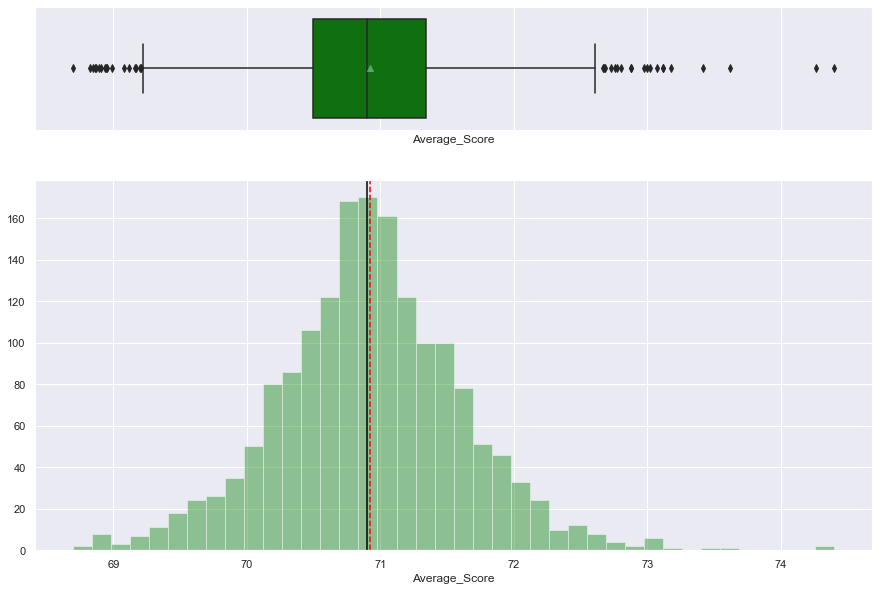

In [20]:
histogram_boxplot(data_clean['Average_Score'])

**Observations**
Distribution looks normal.

#### **Traditional Features UA**

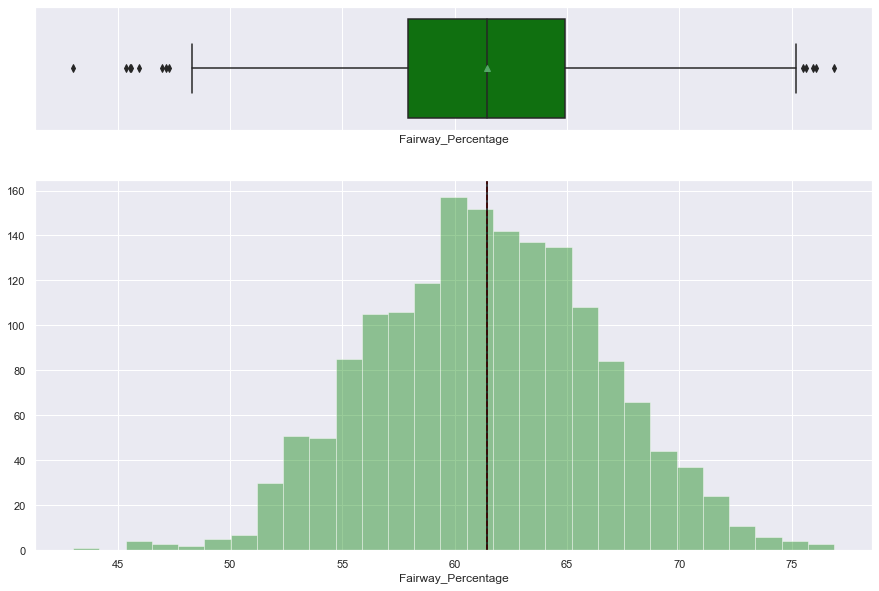

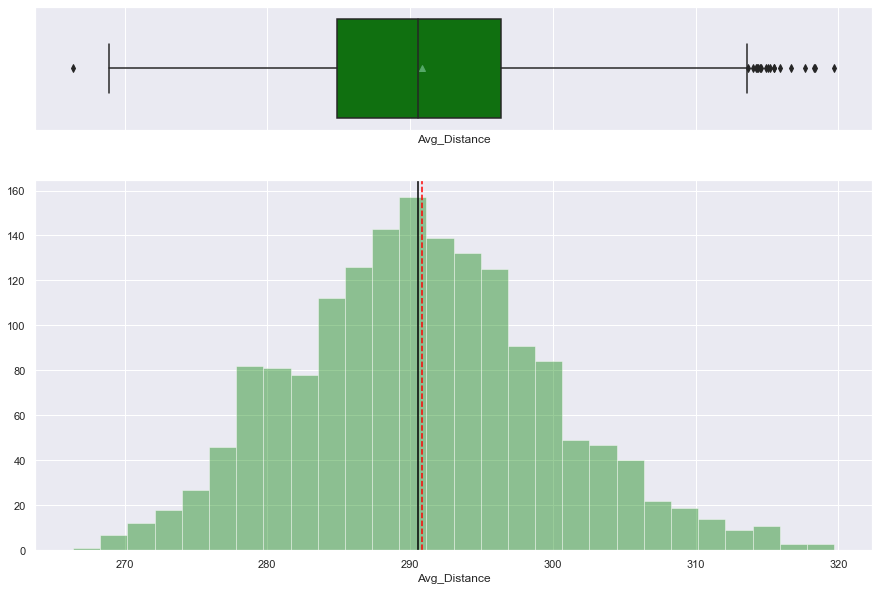

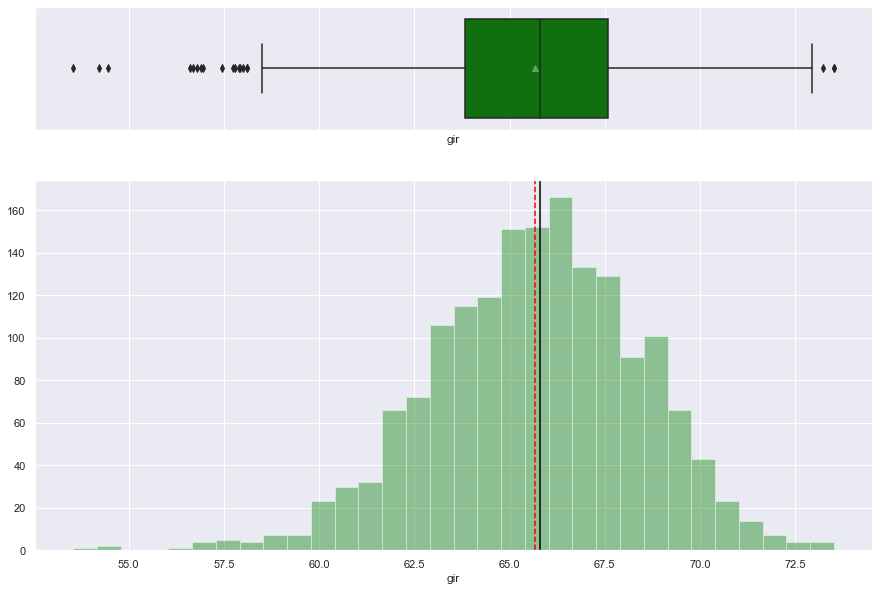

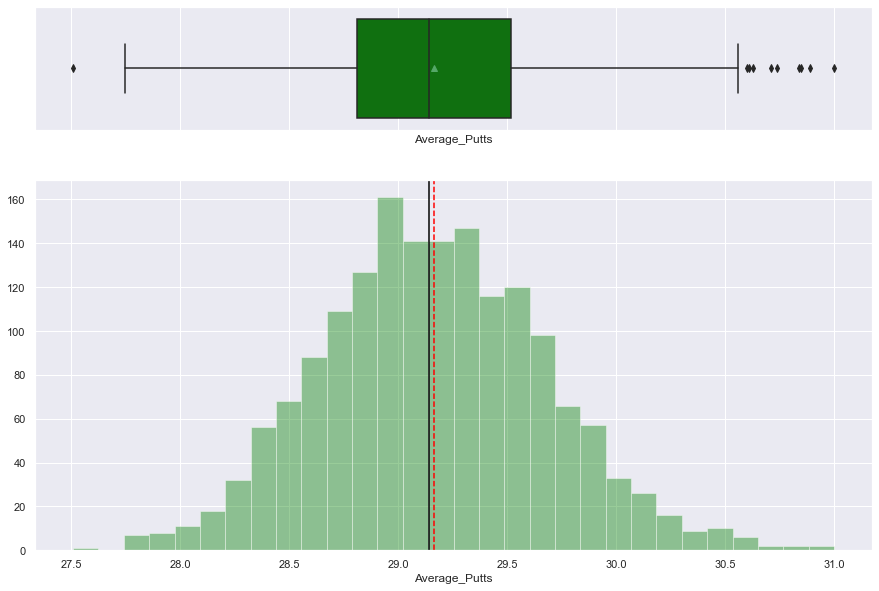

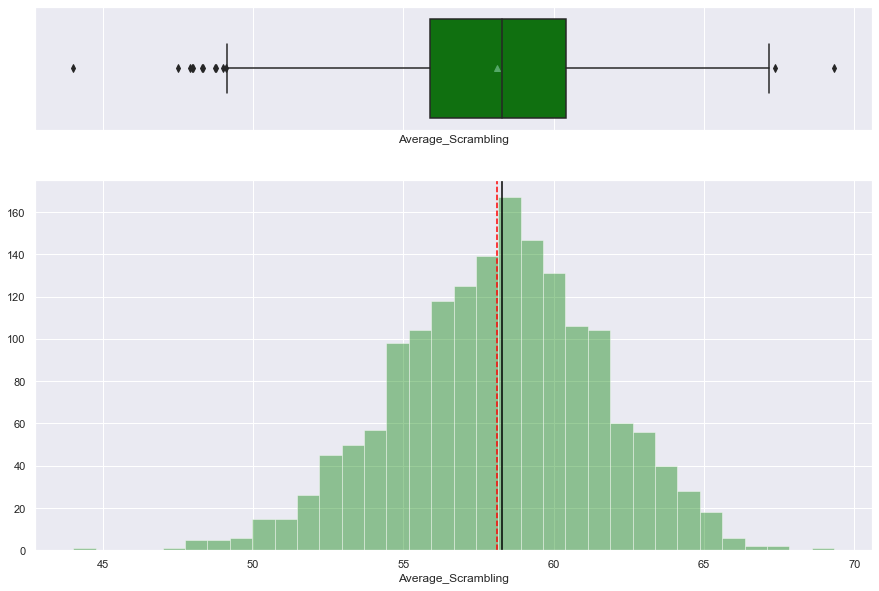

In [21]:
for feature in tfeatures:
    histogram_boxplot(data_clean[feature])

**Observations**
* Distribution for traditionl features looks normal.

* Some outliers present but non so exesive to indicate they are errors and need to be cleaned.

#### **Strokes Gained Features UA**

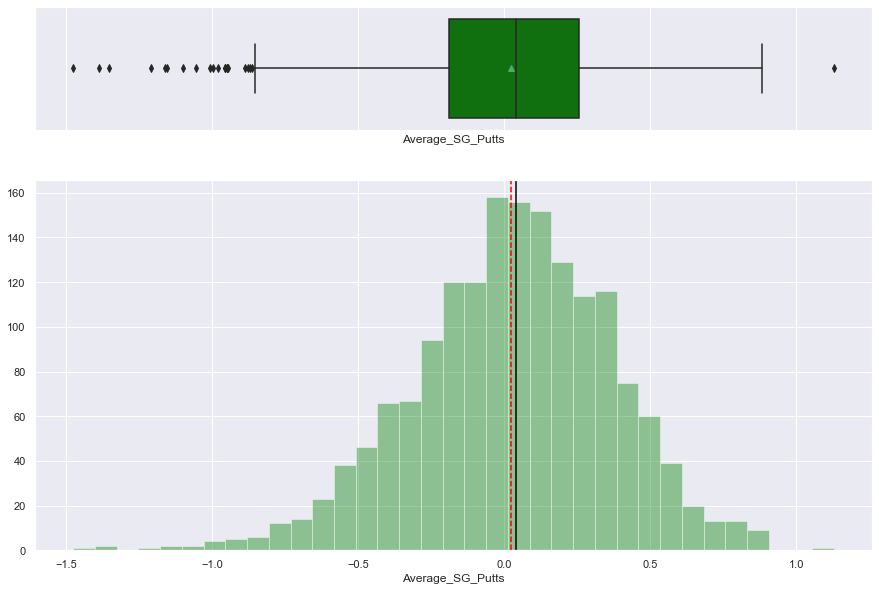

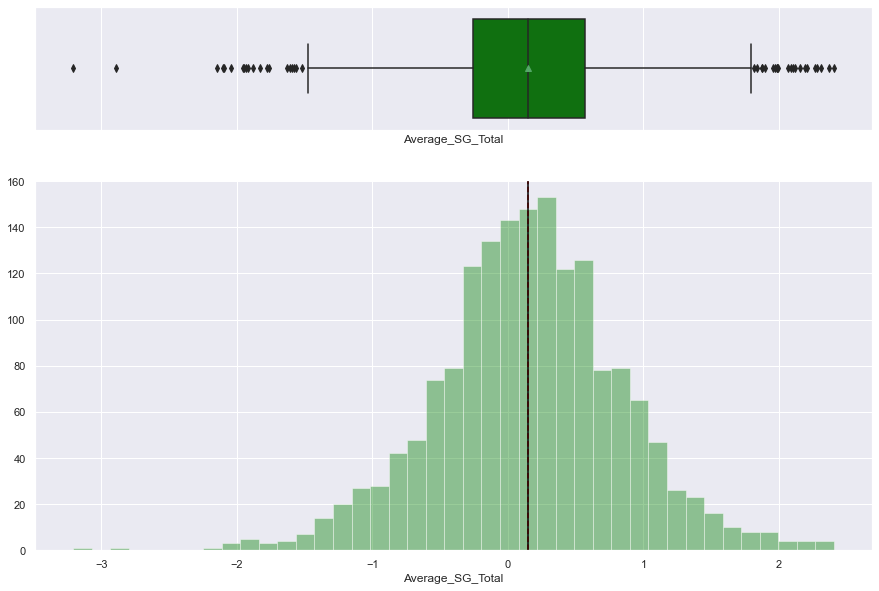

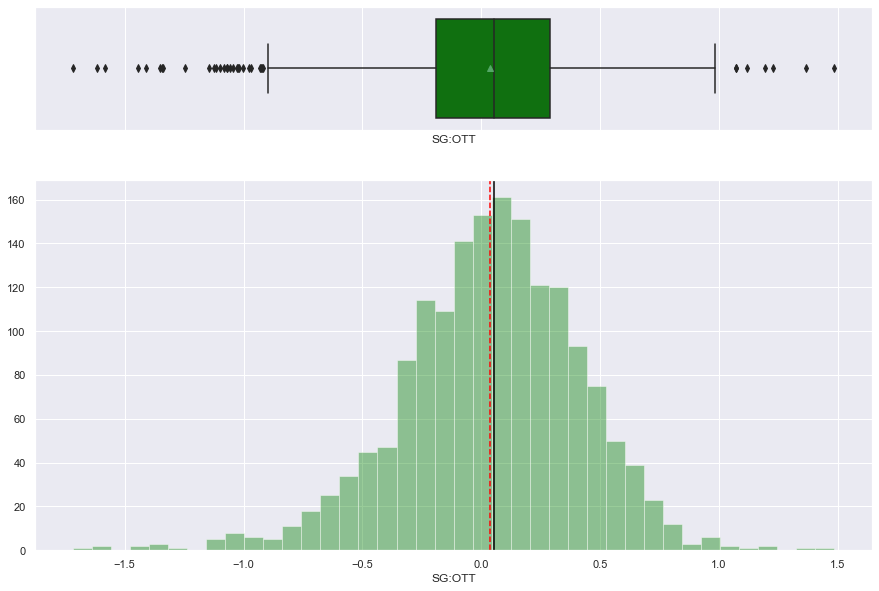

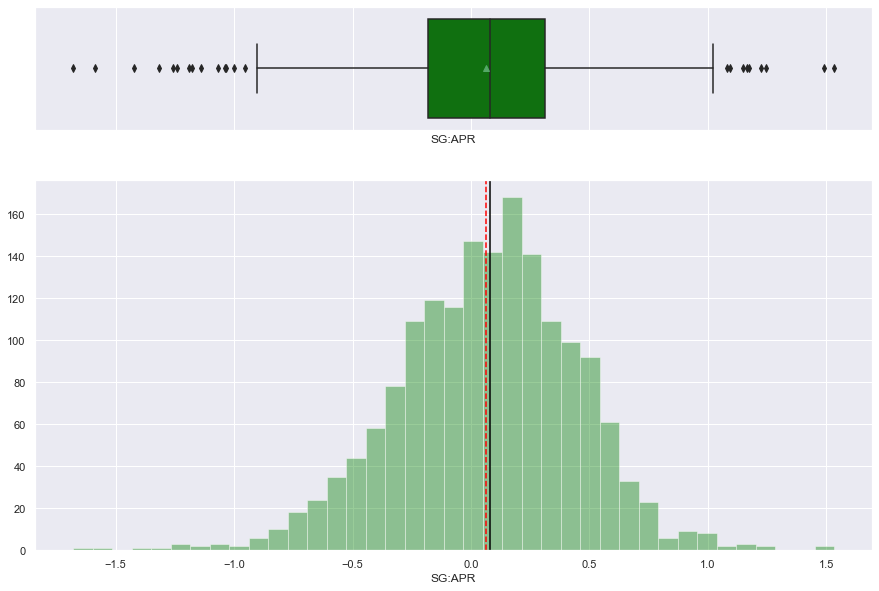

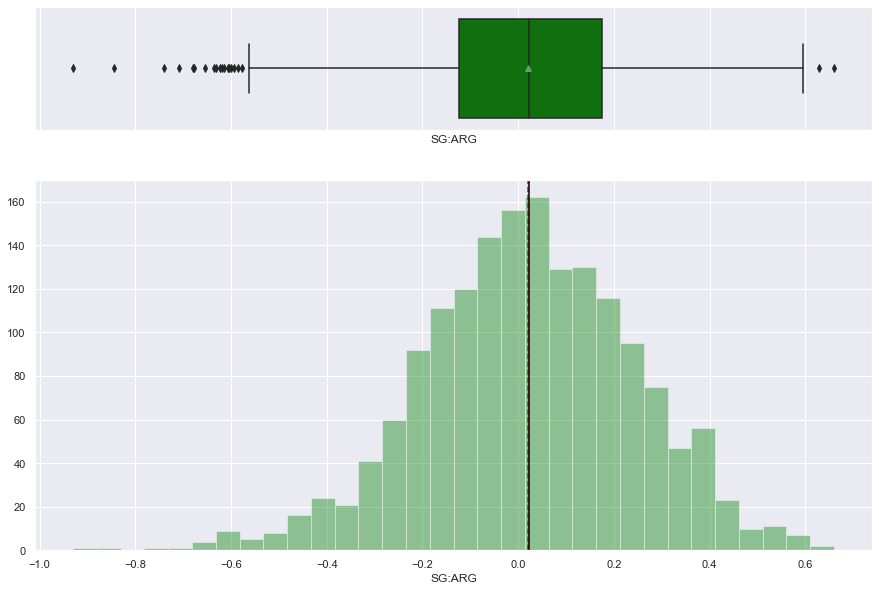

In [22]:
for feature in sgfeatures:
    histogram_boxplot(data_clean[feature])

  **Observations**
* Distribution for SG features looks normal.
* Some outliers present but non so exesive to indicate they are errors and need to be cleaned.
* Most strokes gained features are central around 0 with a larger range toward negative values, meaning players perform worse than others to a greater extent than there are players who play better than others. 

### **Bivariant Analysis**

**Analysis Plan:**
1. Plot Correlation heat map to find strong correlations (above +/- 0.7)
2. Focus on correlations with Average Score and with Average Strokes Gained and the other SG features
3. Scatter plot analyse of those correlations of interest.

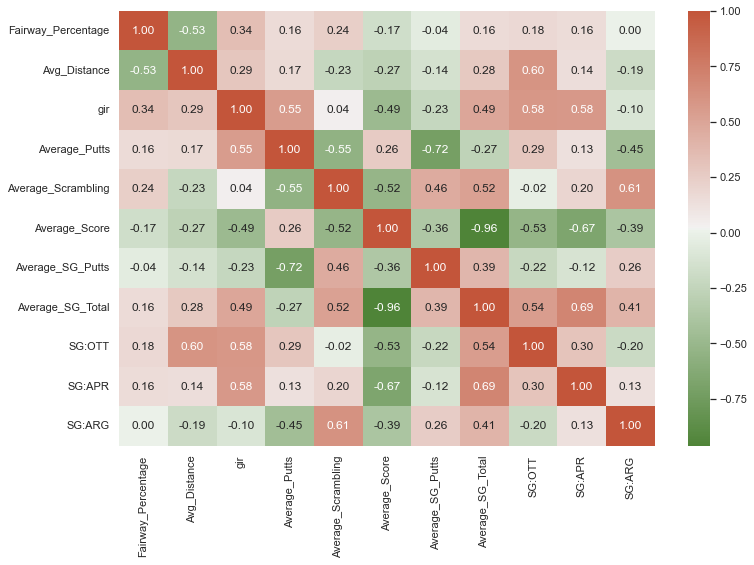

In [23]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(120, 20, as_cmap = True)

sns.heatmap(data_clean.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

The high correlations for `Average_Score` are (Keep in mind a lower score is better so the correlations will be negative):
* `Average_SG_Total` - Makes sense as we have already said it is another marker for playing well, it will be exluded from our model.
* `SG:APR` is the only feature above a 0.6 
* `gir`, `Average_Scrambling`, and `SG:OTT` are the only other values of mild correlation. 

**Already we are are seeing a dispelling of some long standing myths:**
* Strokes gained features beat out the other top 4 traditional features in overall correlation (1.96 versus 1.55)
* The lower order shots (tee shots and approach shots) are showing higher correlation than the green shots. Despite the long standing view in golf that green play is the more valuable skill. 
* Our hypothesis that fairways hit in regulation is a traditional stat that sounds good but can be misleading has prooven to be true, having the lowest correlation with `Average_Score` (0.17) of any stat.
* The same is similarly true for greens hit in regulation, despite having a correlations of (0.49) with `Average_Score` it performs worse than its strokes gained counter part SG_APR with a correlation of (0.67). Meaning that there are likely miss-leading shots in `gir` that are reducing its total correlation.  

The high strokes gained correlations for `Average_SG_Total` are:
* SG:APR(0.67)>SG:OTT(0.53)>SG:ARG(0.39)>Average_SG_Putts(0.36) - Again showing that the traditional view putting is the higher value skill is likely incorect and in fact the opposite is likely to be true.

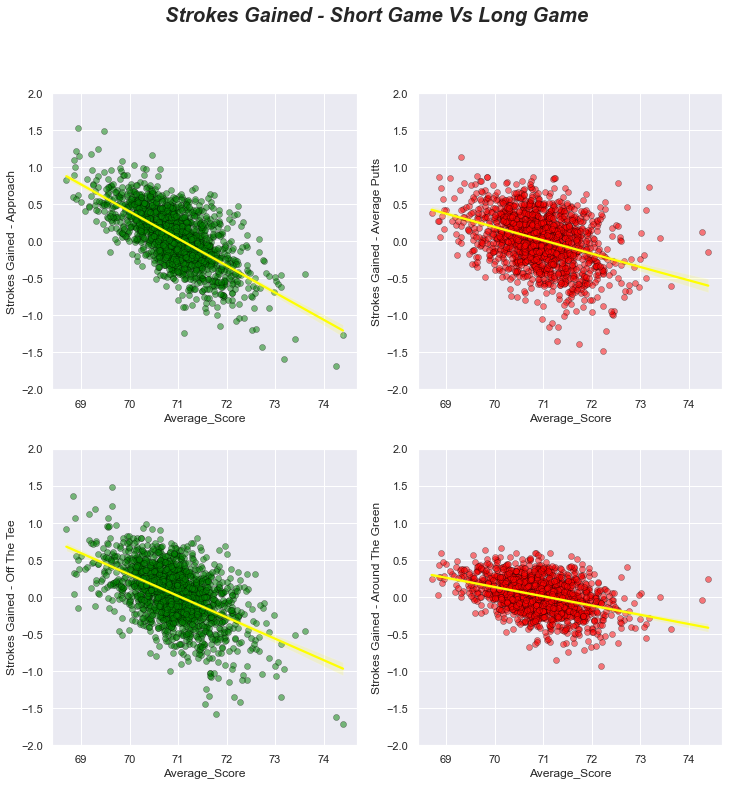

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(x = 'Average_Score', y = 'SG:APR', data = data_clean, ax=axs[0,0], color = 'green', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average_Score', y = 'SG:APR', data = data_clean, scatter=False, ax=axs[0,0], color = 'yellow')
axs[0,0].set_ylim(-2.0, 2.0)
axs[0,0].set_ylabel("Strokes Gained - Approach")

sns.scatterplot(x = 'Average_Score', y = 'Average_SG_Putts', data = data_clean, ax=axs[0,1], color = 'red', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average_Score', y = 'Average_SG_Putts', data = data_clean, scatter=False, ax=axs[0,1], color = 'yellow')
axs[0,1].set_ylim(-2.0, 2.0)
axs[0,1].set_ylabel("Strokes Gained - Average Putts")

sns.scatterplot(x = 'Average_Score', y = 'SG:OTT', data = data_clean, ax=axs[1,0], color = 'green', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average_Score', y = 'SG:OTT', data = data_clean, scatter=False, ax=axs[1,0], color = 'yellow')
axs[1,0].set_ylim(-2.0, 2.0)
axs[1,0].set_ylabel("Strokes Gained - Off The Tee")

sns.scatterplot(x = 'Average_Score', y = 'SG:ARG', data = data_clean, ax=axs[1,1], color = 'red', alpha=0.50, edgecolor = 'black')
sns.regplot(x = 'Average_Score', y = 'SG:ARG', data = data_clean, scatter=False, ax=axs[1,1], color = 'yellow')
axs[1,1].set_ylim(-2.0, 2.0)
axs[1,1].set_ylabel("Strokes Gained - Around The Green")

plt.suptitle("Strokes Gained - Short Game Vs Long Game", fontsize=20, fontweight='bold', fontstyle='oblique')

# Save the visualization to a file
plt.savefig("Strokes Gained - Short Game Vs Long Game.png")

plt.show()



**Observations**
* We can see that both short game (red) and long game (green) are indicators of lower scores as expected. 
* But the short range data points are much **more tightly bound** and the line of best fit is **steeper**.
* This again clearly shows that the traditional view that short game is the higher value skill is a myth. 

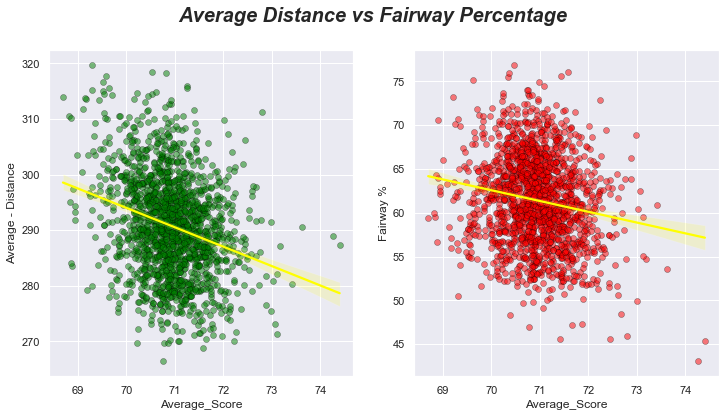

In [51]:
# Scatterplot to visualize Average Distance vs Fairway Percentage
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x = 'Average_Score', y = 'Avg_Distance', data = data_clean, ax=axs[0], color = 'green', alpha = 0.5, edgecolor = 'black')
sns.regplot(x = 'Average_Score', y = 'Avg_Distance', data = data_clean, scatter=False, ax=axs[0], color = 'yellow')
axs[0].set(xlabel='Average_Score', ylabel='Average - Distance')

sns.scatterplot(x = 'Average_Score', y = 'Fairway_Percentage', data = data_clean, ax=axs[1], color = 'red', alpha = 0.5, edgecolor = 'black')
sns.regplot(x = 'Average_Score', y = 'Fairway_Percentage', data = data_clean, scatter=False, ax=axs[1], color = 'yellow')
axs[1].set(xlabel='Average_Score', ylabel='Fairway %')

fig.suptitle("Average Distance vs Fairway Percentage", fontsize=20, fontweight='bold', fontstyle='oblique')

# Save the visualization to a file
plt.savefig("Average Distance vs Fairway Percentage.png")

plt.show()


**Observations**
* We can also see from the above comparison that Avg_Distance more tightly predics a lower score. This means that our second traditional view that driving accuracy (fairways hit %) is more valuable than pure driving distance is also likely a myth. 

--------------------------------
### **Conclusion** 
-------------------------------
EDA demonstrates the value of data science and analytics in golf, specifically the use of the Strokes Gained metric, in providing a more accurate and comprehensive assessment of a player's performance. Strokes Gained can help identify areas for improvement and dispel misconceptions about the game. Through analyzing data from the 2010 to 2018 PGA Tour season we have gained critical insight into the performance of professional golfers and to identify which features lead to the greatest success in golf. Some of those key insights include:

* Strokes gained features beat out the other top 4 traditional features in overall correlation with `Average_Score`(1.96 versus 1.55)
* In correlation with Average_SG_Total : SG:APR(0.67) > SG:OTT(0.53) > SG:ARG(0.39) > Average_SG_Putts(0.36)
  * Showing that the traditional view short game is the higher value skill is likely incorect and in fact the opposite is likely to be true.
   * this is visualized and re-confirmed in our scatter plots
* Our hypothesis that fairways hit in regulation is a traditional stat that sounds good but can be misleading has prooven to be true, having the lowest correlation of 0.17 with `Average_Score`.
* The same is similarly true for greens hit in regulation, despite having a correlations of (0.49) with `Average_Score` it performs worse than its strokes gained counter-part SG_APR with a correlation of (0.67). Meaning that there are likely miss-leading shots in `gir` that are reducing its total correlation. 
* Driving distance has a greater correlation with average score than fairway percentage (0.27 vs 0.17). This means that our second traditional view that driving accuracy (fairways hit %) is more valuable than pure driving distance is also likely a myth.
  * This is confirmed visualy by our scatter plot showing driving distance has a much tigher relationship.
--------------------------------
### **Recommendations** 
-------------------------------
Recommendations based on the insights gained from this project include focusing on Strokes Gained as a metric for assessing performance and identifying areas for improvement, and using data-driven, facts-based analysis to dispel misconceptions about the game. Additionally, the project results can be used to inform training and practice for golfers at all levels, focusing on the specific skills and areas identified as leading to success in golf.
* Average_Score is a good metric that focuses on playing well. It is adjusted for the average score of each tournament, but that should only increase its validity. It is our best option of all predictive features. 
* Dropped a number of irrelevant or potentially biased columns from our analysis, we should repeat this step for the model building phase. Droped Columns include:
    * `Points`, `Wins`, `Top_10`, and `Money` - potential predictive features that would not perform as well as `Average_Score`.
    * `Player_Name`, `Year` - irrelevant features.
    * `Rounds` - irrelevant to performance stats, but could biase the data as better players tend to play fewer tournaments. 
    * Kept `Average_SG_Total` for analysis but should drop from model analysis as it too tightly correlated with `Average_Score`. While it would prove valuable as a predictive feature, it would prevent us from seeing which component features of strokes gained are more critical. 